In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.neighbors import KNeighborsClassifier

1. Charge le dataset et mène une analyse exploratoire : le nombre de features, les corrélations dans les données, les indicateurs statistiques (de position, de dispersion)...

In [3]:
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2020.csv"
df_weather = pd.read_csv(link)

In [4]:
########  INFOS SUR LES FEATURES  ########
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    366 non-null    object 
 1   MAX_TEMPERATURE_C       366 non-null    int64  
 2   MIN_TEMPERATURE_C       366 non-null    int64  
 3   WINDSPEED_MAX_KMH       366 non-null    int64  
 4   TEMPERATURE_MORNING_C   366 non-null    int64  
 5   TEMPERATURE_NOON_C      366 non-null    int64  
 6   TEMPERATURE_EVENING_C   366 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     366 non-null    float64
 8   HUMIDITY_MAX_PERCENT    366 non-null    int64  
 9   VISIBILITY_AVG_KM       366 non-null    float64
 10  PRESSURE_MAX_MB         366 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  366 non-null    float64
 12  HEATINDEX_MAX_C         366 non-null    int64  
 13  DEWPOINT_MAX_C          366 non-null    int64  
 14  WINDTEMP_MAX_C          366 non-null    in

In [ ]:
# nous avons 23 colonnes, sans aucune valeurs nulles : 18 colonnes avec des valeurs du type 'Entier' / 4 du type 'float' 
# soit 22 colonnes numériques et 2 colonnes 'object' qui sont en fait une colonne avec des dates (à mettre sous le bon format) 
# et une colonne avec des valeurs texte 'str'

#le df contient 366 lignes, une pour chaque jour de l'année 2020

In [6]:
#Transformation de la colonne 'DATE' dans le format Datetime
df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])

In [5]:
########  INDICATEURS STATISTIQUES  ########
df_weather.describe()

,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,MONTH,DAY
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.0,366.000000,366.000000,366.000000,366.000000
mean,16.997268,11.259563,20.991803,10.631148,15.770492,15.275956,3.169126,86.603825,9.237022,1019.562842,50.017760,17.311475,11.256831,9.707650,160.926230,166.172131,181.278689,0.0,3.639344,9.269126,6.513661,15.756831
std,6.369232,4.510670,8.546565,4.601133,6.018857,6.450046,6.408436,7.501151,1.059369,8.309106,28.935057,6.688467,4.225123,5.728018,74.537276,81.604763,93.009523,0.0,1.681807,3.399074,3.455958,8.823592
min,5.000000,0.000000,3.000000,-1.000000,3.000000,3.000000,0.000000,47.000000,3.000000,982.000000,0.000000,5.000000,0.000000,-5.000000,113.000000,113.000000,113.000000,0.0,1.000000,3.300000,1.000000,1.000000
25%,12.000000,8.000000,14.000000,8.000000,11.000000,10.000000,0.000000,83.000000,8.750000,1016.000000,24.750000,12.000000,8.000000,6.000000,116.000000,116.000000,116.000000,0.0,3.000000,6.700000,4.000000,8.000000
50%,16.000000,11.000000,20.000000,11.000000,15.000000,14.000000,0.400000,88.500000,9.875000,1020.000000,53.937500,16.000000,12.000000,10.000000,119.000000,116.000000,122.000000,0.0,4.000000,9.100000,7.000000,16.000000
75%,21.000000,15.000000,26.000000,14.000000,20.000000,20.000000,2.900000,92.000000,10.000000,1024.000000,74.000000,23.000000,14.000000,14.000000,176.000000,176.000000,176.000000,0.0,5.000000,11.600000,9.750000,23.000000
max,38.000000,23.000000,50.000000,23.000000,35.000000,37.000000,53.300000,99.000000,10.000000,1044.000000,100.000000,38.000000,22.000000,23.000000,353.000000,389.000000,389.000000,0.0,8.000000,14.500000,12.000000,31.000000


In [ ]:
# La colonne 'TOTAL_SNOW_MM' ne contient que la valeur 0
# Les colonnes MONTH et DAY correspondent aux numéros de mois et des jours et ne sont donc pas vraiment des colonnes numériques
# Pour toutes les autres colonnes, on peut observer la distibution des données sur l'année 2020. 

# Par exemple, on a un indicateur de températures maximales par jour qui nous indique que :
# le jour où la température max était la plus basse, elle était de 5°C et le jour où elle était la plus haute, elle était de 38°C. 
# La moyenne et la médianne se situent toute 2 à 16°C
# La moitié des valeurs se situent entre 12 et 21 °C

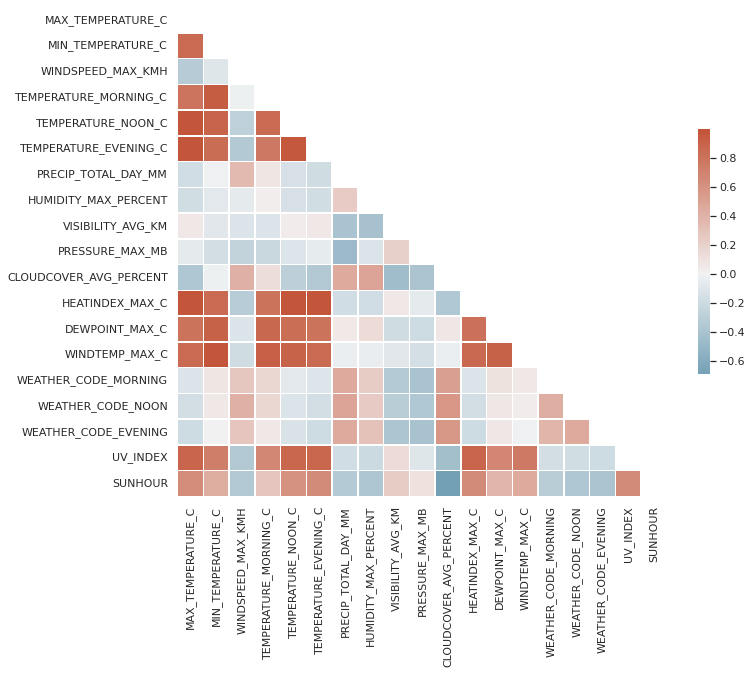

In [20]:
######## CORRELATION DANS LES DONNEES ########

# Source: http://man.hubwiz.com/docset/Seaborn.docset/Contents/Resources/Documents/examples/many_pairwise_correlations.html

sns.set_theme(style="white")
rs = np.random.RandomState(33)
corr = df_weather.drop(columns=['MONTH', 'DAY', 'TOTAL_SNOW_MM'], axis = 1).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
# Toutes les données de températures sont corrélées entre elles (min,max,mornig,noon,evening,heatindex,dexpoint,windtemp)
# Cloudcover est corrélée négativement avec Sunhour (logique)

2. Crée un slice du dataset avec uniquement les colonnes numériques (tu peux utiliser la méthode .select_dtypes(include='number') pour t'aider). Tu nommeras ce slice : X. Ce slice X doit avoir 366 lignes et 22 colonnes. Crée un second slice avec uniquement la colonne OPINION. Tu nommeras ce slice y.

In [23]:
X = df_weather.select_dtypes(include='number')
X.shape

(366, 22)

In [24]:
y = df_weather['OPINION']

3. Utilise un scaler pour mettre à l'échelle tes données. Tu transformeras tes données avec ce scaler, et tu enregistreras les données mises à l'échelle dans `X_scaled, qui doit également avoir 366 lignes et 22 colonnes.

In [27]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled.shape

(366, 22)

4. Instancie un objet pca, et entraine-le sur tes données standardisées.

In [37]:
pca = PCA()
pca.fit(X_scaled)

PCA()

5. Combien de composantes principales expliquent au moins 70% de la variance ? Tu peux t'aider de l'attribut pca.explained_variance_ratio_. Et 80% ?

In [38]:
pca.explained_variance_ratio_

array([4.09974128e-01, 2.08764137e-01, 6.44852689e-02, 5.96277270e-02,
       4.57715483e-02, 3.90945593e-02, 2.96727035e-02, 2.79956895e-02,
       2.50111074e-02, 2.23798923e-02, 2.06096373e-02, 1.72091698e-02,
       1.06921087e-02, 5.50690832e-03, 5.23972301e-03, 3.80814302e-03,
       2.24566722e-03, 7.91559882e-04, 5.45015534e-04, 4.08638014e-04,
       1.66668050e-04, 5.24109907e-36])

In [39]:
np.around(pca.explained_variance_ratio_, decimals=2)

array([0.41, 0.21, 0.06, 0.06, 0.05, 0.04, 0.03, 0.03, 0.03, 0.02, 0.02,
       0.02, 0.01, 0.01, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [ ]:
# La première composante principale explique 41% de la variance
# Les 2 premières composantes principales expliquent 62% de la variance
# Les 3 premières composantes principales expliquent 68% de la variance
# Les 4 premières composantes principales expliquent 74% de la variance
# Les 5 premières composantes principales expliquent 79% de la variance
# Les 6 premières composantes principales expliquent 83% de la variance

# Il faut donc 4 composantes principales pour expliquer 70% de la variance et 6 pour expliquer 80% de la variance

6. Transforme tes données grâce à pca.fit_transform(X_scaled), et stocke le résultat dans X_pca. Affiche sur une nuage de points les 2 premières colonnes (celles qui expliquent le plus de variance). Mets une couleur différente pour chaque OPINION. Tu devrais obtenir un graphique de ce type :

In [80]:
X_pca = pca.fit_transform(X_scaled)

In [82]:
X_pca[:,0:2]

array([[-2.97987147e+00,  2.61453732e+00],
       [-2.69583660e+00, -6.35319084e-02],
       [-2.31402513e+00,  3.34659328e-02],
       [-3.36763123e+00, -3.24005838e+00],
       [-3.67138991e+00, -3.27288176e+00],
       [-3.84970865e+00, -2.71686652e+00],
       [-2.46162269e+00,  3.58010893e+00],
       [-2.10208439e+00,  2.66258024e+00],
       [-2.66158476e+00,  2.28138670e+00],
       [-3.41506874e+00, -1.89732582e+00],
       [-3.80661406e+00, -2.42791453e+00],
       [-2.43741132e+00,  9.85551165e-02],
       [-2.94338219e+00,  1.98247500e+00],
       [-3.10293154e+00,  4.56613155e+00],
       [-2.43373066e+00,  8.17265077e-01],
       [-2.43026333e+00, -1.48916060e+00],
       [-3.61248849e+00,  1.15072649e+00],
       [-3.60394032e+00, -2.14496809e+00],
       [-5.03699352e+00, -3.78466773e+00],
       [-5.22322841e+00, -4.02237194e+00],
       [-5.97333739e+00, -3.95622447e+00],
       [-5.43020202e+00, -4.10650999e+00],
       [-5.82220369e+00, -3.28115889e+00],
       [-3.

In [84]:
data_pca = pd.concat([pd.DataFrame(X_pca).iloc[:,0:2],
                df_weather['OPINION']], axis =1 )

In [88]:
data_pca.rename({0 : 'pc1', 1 : 'pc2'}, axis =1, inplace = True)

In [89]:
data_pca.columns

Index(['pc1', 'pc2', 'OPINION'], dtype='object')

In [92]:
px.scatter(data_pca, x = 'pc1', y = 'pc2', color = 'OPINION')

7. Lance une classification KNN sur X_scaled et y. Quel est ton score ? Lance une autre classification KNN sur les deux premières colonnes de X_pca et y. Le score est-il très différent ?

In [96]:
modelKNN1 = KNeighborsClassifier().fit(X_scaled, y)
print(f"score X_scaled = {modelKNN1.score(X_scaled, y)}")

score X_scaled = 0.8661202185792349


In [97]:
modelKNN2 = KNeighborsClassifier().fit(X_pca[:,0:2], y)
print(f"score X_scaled = {modelKNN2.score(X_pca[:,0:2], y)}")

score X_scaled = 0.8469945355191257


In [98]:
# Les 2 scores sont relativement proches. Le 2ème score est fait à partir d'un peu moins de variable 
# donc forcément légèrement plus bas mais le score reste très bon et proche de celui qui utilise toutes les variables.
# Le deuxième permet donc bien de préserver la qualité du modèle.